In [13]:
import pandas as pd
import pickle
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv("C:/Users/Hanush/Downloads/car purchase.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [15]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [16]:
df.info

<bound method DataFrame.info of      User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]>

In [17]:
df = pd.get_dummies(df,dtype=int)
print(df)

     User ID  Age  AnnualSalary  Purchased  Gender_Female  Gender_Male
0        385   35         20000          0              0            1
1        681   40         43500          0              0            1
2        353   49         74000          0              0            1
3        895   40        107500          1              0            1
4        661   25         79000          0              0            1
..       ...  ...           ...        ...            ...          ...
995      863   38         59000          0              0            1
996      800   47         23500          0              1            0
997      407   28        138500          1              1            0
998      299   48        134000          1              1            0
999      687   44         73500          0              1            0

[1000 rows x 6 columns]


In [18]:
cor_mat=df.corr()
cor_mat

,User ID,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
User ID,1.000000,0.017647,0.006541,0.015911,0.039164,-0.039164
Age,0.017647,1.000000,0.166042,0.616036,0.084760,-0.084760
AnnualSalary,0.006541,0.166042,1.000000,0.364974,0.063301,-0.063301
Purchased,0.015911,0.616036,0.364974,1.000000,0.047211,-0.047211
Gender_Female,0.039164,0.084760,0.063301,0.047211,1.000000,-1.000000
Gender_Male,-0.039164,-0.084760,-0.063301,-0.047211,-1.000000,1.000000


In [38]:
y=df['Purchased']#copied to check
x=df.drop('Purchased',axis=1) #removed for model

In [39]:
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [40]:
x

,User ID,Age,AnnualSalary,Gender_Female,Gender_Male
0,385,35,20000,0,1
1,681,40,43500,0,1
2,353,49,74000,0,1
3,895,40,107500,0,1
4,661,25,79000,0,1
...,...,...,...,...,...
995,863,38,59000,0,1
996,800,47,23500,1,0
997,407,28,138500,1,0
998,299,48,134000,1,0


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42) 


In [42]:
x_train

,User ID,Age,AnnualSalary,Gender_Female,Gender_Male
703,368,36,89500,0,1
311,614,51,98500,1,0
722,874,39,128500,1,0
629,323,61,84500,0,1
0,385,35,20000,0,1
...,...,...,...,...,...
106,398,36,56500,0,1
270,35,42,53000,1,0
860,626,37,33000,1,0
435,931,43,112000,1,0


In [43]:
x_test

,User ID,Age,AnnualSalary,Gender_Female,Gender_Male
521,176,41,73500,0,1
737,448,59,135500,0,1
740,391,25,59500,0,1
660,623,47,42500,1,0
411,773,46,135500,1,0
...,...,...,...,...,...
506,22,56,131500,1,0
342,487,48,51500,1,0
485,421,53,39500,1,0
711,363,51,32500,1,0


In [44]:
y_test

521    0
737    1
740    0
660    1
411    0
      ..
506    1
342    1
485    1
711    1
133    0
Name: Purchased, Length: 330, dtype: int64

In [45]:
y_train

703    0
311    1
722    1
629    1
0      0
      ..
106    0
270    0
860    0
435    1
102    0
Name: Purchased, Length: 670, dtype: int64

In [46]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train) #for fitting and training the model


LogisticRegression()

In [47]:
y_pred=classifier.predict(x_test)

In [48]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,

In [61]:
from sklearn.metrics import confusion_matrix  #[ tp tn ]
                                              #[ fp fn ]
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[127  62]
 [ 68  73]]


In [62]:
from sklearn.metrics import accuracy_score  #tp+tn/tp+tn+fp+fn
accuracy_score(y_test,y_pred)

0.6060606060606061

In [63]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

0.3939393939393939

<AxesSubplot:>

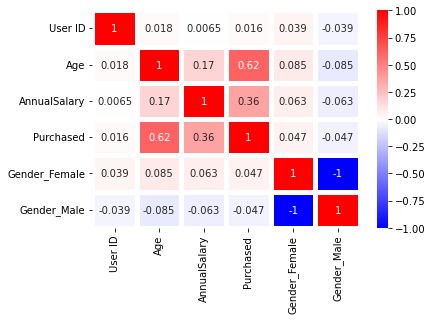

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cor_mat,vmax=1,vmin=-1,annot=True,linewidth=5,cmap='bwr')

Text(87.0, 0.5, 'Actual value')

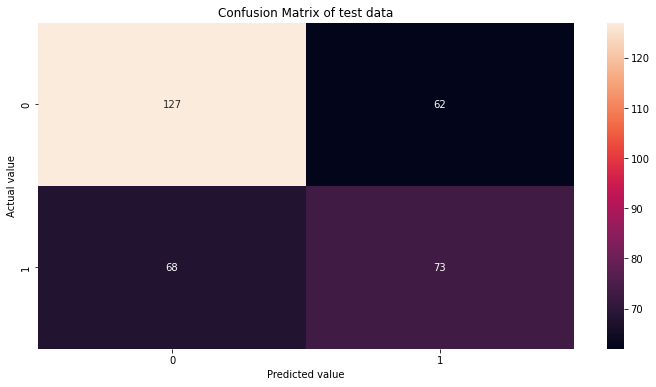

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of test data")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
